**INTRODUCTION**

For this project, I'll be working with "Womart," leading nutrition and supplement retail chain that offers a comprehensive range of products for wellness and fitness needs.

The purpose of this notebook will be to predict the number of sales for each store to provide the stores with essential insights into the upcoming inventory and cash flow for the following months.

The dataset that they provided contains the information of sales of the past 18 months along with:

ID: Unique identifier for a row

Store id: Unique id for 

Store type: Type of the store

Location type: Type of the location where the store is located

Region Code: Code of the region where the store is located

Date: Information about the date

Holiday: If there is a holiday on the given date

Discount: If the store offers a discount on the given dateeach store

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data=pd.read_csv('TRAIN.csv')
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
test_data=pd.read_csv('TEST_FINAL.csv')
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [4]:
#Checking null values
train_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [5]:
test_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

# Data Preprocessing

In [6]:
#Rename Values
train_data['Discount']=train_data['Discount'].map({'Yes':1,'No':0})

In [7]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


In [8]:
#Checking data type of each columns
train_data.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount           int64
#Order             int64
Sales            float64
dtype: object

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  int64  
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 14.4+ MB


In [10]:
train_data.describe()

,Store_id,Holiday,Discount,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,0.447536,68.205692,42784.327982
std,105.366308,0.338256,0.497241,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,1.000000,82.000000,51909.000000
max,365.000000,1.000000,1.000000,371.000000,247215.000000


In [11]:
#Changing data type of Store_id,Holiday and Discount to object
train_data[['Store_id','Holiday','Discount']]=train_data[['Store_id','Holiday','Discount']].astype(object)

In [12]:
train_data['Date']=pd.to_datetime(train_data.Date)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  object        
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  object        
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 14.4+ MB


In [14]:
# Do we have duplicates?
print('Number of duplicates:', len(train_data[train_data.duplicated()]))

# Do we have missing values?
print('Number of missing values:', train_data.isnull().sum().sum())

Number of duplicates: 0
Number of missing values: 0


# EDA

In [15]:
# Which are the best stores (by number of sells)?
best_stores = train_data.groupby(['Store_id'], as_index=False)['Sales'].sum()        # sum sales from same store
best_stores = best_stores.sort_values('Sales', ascending = False)                # sort data
best_stores = best_stores.head(20)                                               # select top 20
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

C:\Users\Soham Lad\AppData\Local\Temp\ipykernel_24728\3451718849.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Store_id",y="Sales",data=best_stores,palette="viridis")


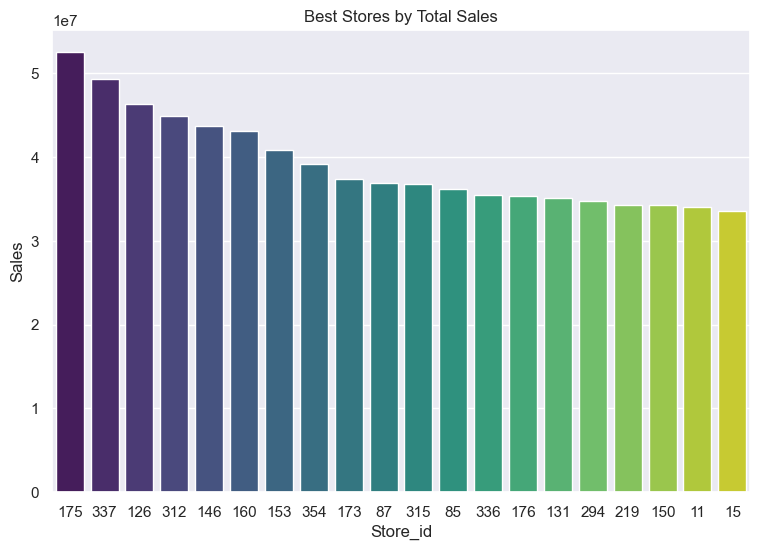

In [16]:
#Best Stores according to sells

best_stores=train_data.groupby(['Store_id'],as_index=False)['Sales'].sum()

#Sorting data
best_stores=best_stores.sort_values('Sales',ascending=False)
best_stores = best_stores.head(20)
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

sns.set()
# Visualization
fig = plt.subplots(figsize =(9, 6))
sns.barplot(x="Store_id",y="Sales",data=best_stores,palette="viridis")
plt.title("Best Stores by Total Sales")

plt.show()

Stores with id 175,337 and 126 have the most sales

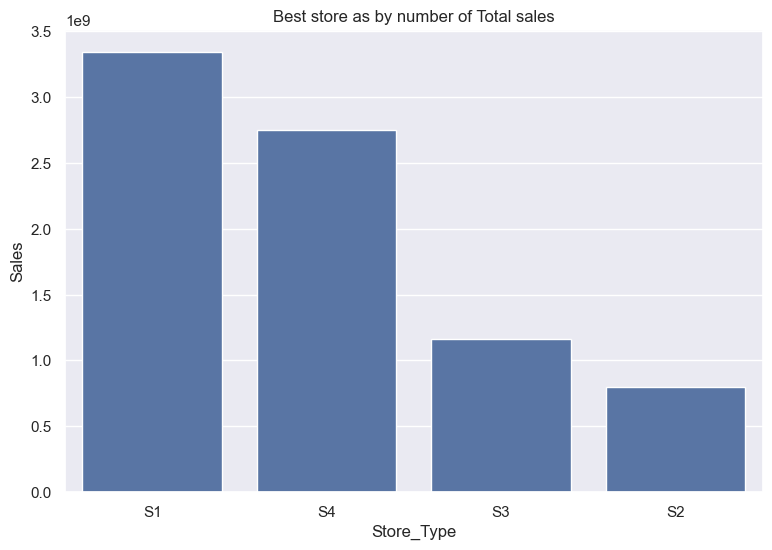

In [17]:
#Best store as by number of sales
best_store_type = train_data.groupby(['Store_Type'], as_index=False)['Sales'].sum()    
best_store_type = best_store_type.sort_values('Sales', ascending = False)                  
best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)

fig=plt.subplots(figsize=(9,6))
sns.barplot(x="Store_Type",y="Sales",data=best_store_type)
plt.title("Best store as by number of Total sales")
plt.show()

Store 1 is best in terms of sales

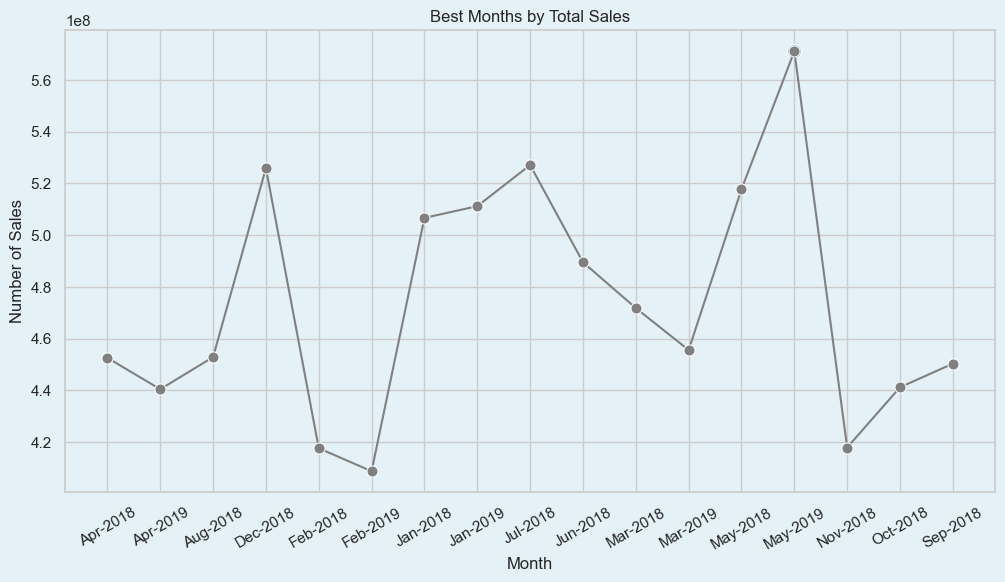

In [18]:
# Best month on basis of total sales
best_month = train_data.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()  

sns.set(style="whitegrid")

# Identify the best month
best_month_1 = best_month.sort_values('Sales', ascending=False).head(1)

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#e4f2f8')  # Set figure background color
ax.patch.set_facecolor('#e4f2f7')   # Set axes background color

sns.lineplot(x='Month', y='Sales', data=best_month, marker='o', markersize=8, color='grey')
sns.scatterplot(x=best_month_1['Month'], y=best_month_1['Sales'], color='#5495c9', s=100)


plt.xticks(rotation=30)
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Best Months by Total Sales')

plt.show()


People seems to buy more products during month Of May and December

C:\Users\Soham Lad\AppData\Local\Temp\ipykernel_24728\3517010199.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location_Type',y='Sales',data=best_location,palette="Greens")


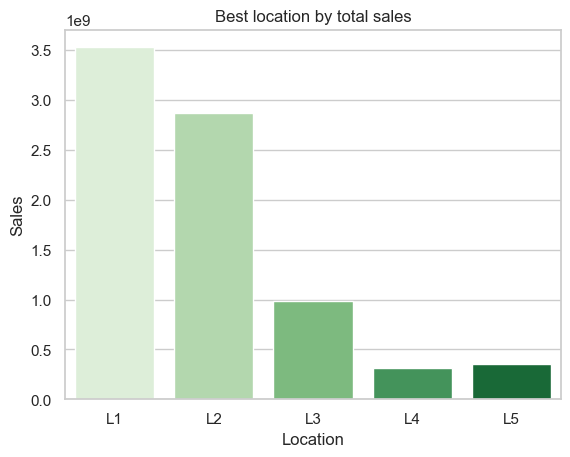

In [19]:
#the best locations by number of sales
best_location= train_data.groupby(['Location_Type'],as_index=False)['Sales'].sum()
best_location['Location_Type'] = best_location['Location_Type'].astype(str)

sns.barplot(x='Location_Type',y='Sales',data=best_location,palette="Greens")

plt.xlabel('Location')
plt.ylabel('Sales')
plt.title("Best location by total sales")
plt.show()

Location L1 and L2 have most sales

C:\Users\Soham Lad\AppData\Local\Temp\ipykernel_24728\3051939303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region_Code',y='Sales',data=best_region,palette="Reds")


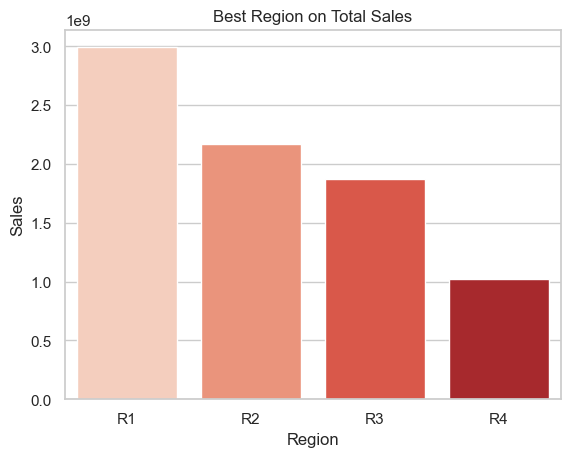

In [20]:
#Best region on Sales
best_region=train_data.groupby(['Region_Code'],as_index=False)['Sales'].sum()
best_region['Region_Code']=best_region['Region_Code'].astype(str)

sns.barplot(x='Region_Code',y='Sales',data=best_region,palette="Reds")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Best Region on Total Sales")
plt.show()

Region 1 is having the maximum sales

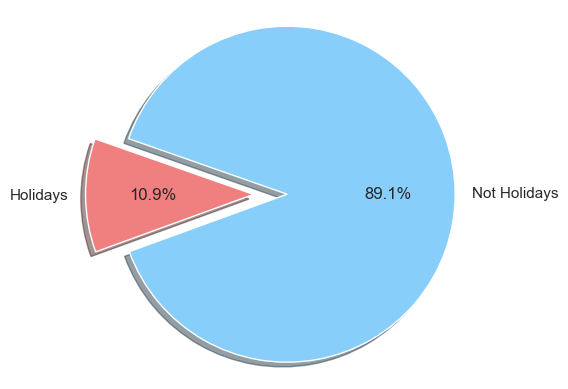

In [21]:
# Holidays Distribution
holiday = train_data.groupby(['Holiday'], as_index=False)['Sales'].sum()    
holiday['Holiday'] = holiday['Holiday'].astype(str)

plt.pie(holiday['Sales'], 
        explode=(0.2, 0), 
        labels=['Not Holidays', 'Holidays'], 
        colors= ['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=200)
        
plt.axis('equal')
plt.show()

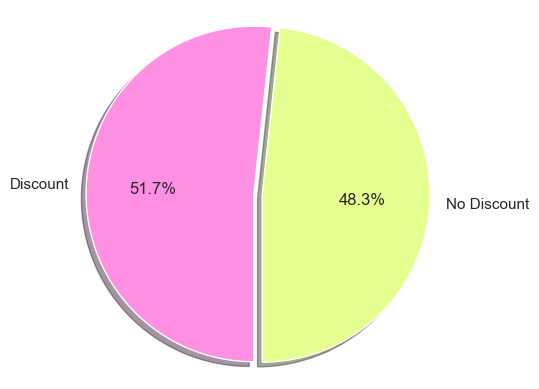

In [22]:
# Discount distribution
discount = train_data.groupby(['Discount'], as_index=False)['Sales'].sum()    
discount['Discount'] = discount['Discount'].astype(str)

plt.pie(discount['Sales'], 
        labels=['No Discount', 'Discount'], 
        explode=(0.05, 0),
        colors= ['#e4ff90', '#ff90e4'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=270)
        
plt.axis('equal')
plt.show()

# Feature Engineering

In [23]:
#Dropping id column as it is of no use
train_data=train_data.drop('ID',axis=1)

In [24]:
train_data['Month'] = train_data['Date'].dt.month 


In [25]:
# Aggregated features
monthly_sales = train_data.groupby(['Store_id', 'Month'], as_index=False)['Sales'].sum()
monthly_sales.columns = ['Store_id', 'Month', 'MonthlySales']
train_data = pd.merge(train_data, monthly_sales, on=['Store_id', 'Month'], how='left')

In [26]:
# Check unique values in 'Store_id'
print(train_data['Store_id'].unique())

# Convert 'Store_id' to numeric type if it contains only numeric values
train_data['Store_id'] = pd.to_numeric(train_data['Store_id'], errors='coerce')
print(train_data.dtypes)


[1 253 252 251 250 249 248 247 246 254 245 11 243 242 241 240 239 238 237
 244 236 255 256 273 272 271 270 269 268 9 267 10 266 264 263 262 261 260
 259 258 257 265 235 234 233 211 210 209 208 207 14 206 205 212 204 202
 201 200 199 198 197 196 195 203 213 214 215 232 12 231 230 229 228 227
 226 225 224 223 222 221 220 219 13 218 217 216 274 15 275 277 335 334 333
 332 331 330 4 329 336 328 326 325 324 323 322 321 320 319 327 318 337 339
 355 354 2 353 352 351 350 349 338 348 346 345 344 343 342 3 341 340 347
 317 5 316 293 7 292 291 290 289 288 287 294 286 284 283 282 281 8 280 279
 278 285 295 296 297 315 314 313 312 311 310 309 308 307 306 305 6 304 303
 302 301 300 299 298 276 194 193 192 87 86 85 24 84 83 82 81 88 80 78 77
 76 75 74 73 72 25 79 71 89 91 108 107 106 105 104 103 102 101 90 100 98
 97 23 96 95 94 93 92 99 70 69 68 46 45 44 43 42 41 40 39 47 38 36 28 35
 34 33 32 31 30 37 27 48 49 67 66 65 64 63 62 61 60 26 59 58 57 56 55 54
 53 52 51 50 22 109 110 111 17 169 168 167 

In [27]:
# One-hot encode categorical columns
train_data = pd.get_dummies(train_data, columns=['Store_Type', 'Location_Type', 'Region_Code'], drop_first=True)

# Check the data types after one-hot encoding
print(train_data.dtypes)

Store_id                     int64
Date                datetime64[ns]
Holiday                     object
Discount                    object
#Order                       int64
Sales                      float64
Month                        int32
MonthlySales               float64
Store_Type_S2                 bool
Store_Type_S3                 bool
Store_Type_S4                 bool
Location_Type_L2              bool
Location_Type_L3              bool
Location_Type_L4              bool
Location_Type_L5              bool
Region_Code_R2                bool
Region_Code_R3                bool
Region_Code_R4                bool
dtype: object


In [28]:
train_data.isnull().sum()

Store_id            0
Date                0
Holiday             0
Discount            0
#Order              0
Sales               0
Month               0
MonthlySales        0
Store_Type_S2       0
Store_Type_S3       0
Store_Type_S4       0
Location_Type_L2    0
Location_Type_L3    0
Location_Type_L4    0
Location_Type_L5    0
Region_Code_R2      0
Region_Code_R3      0
Region_Code_R4      0
dtype: int64

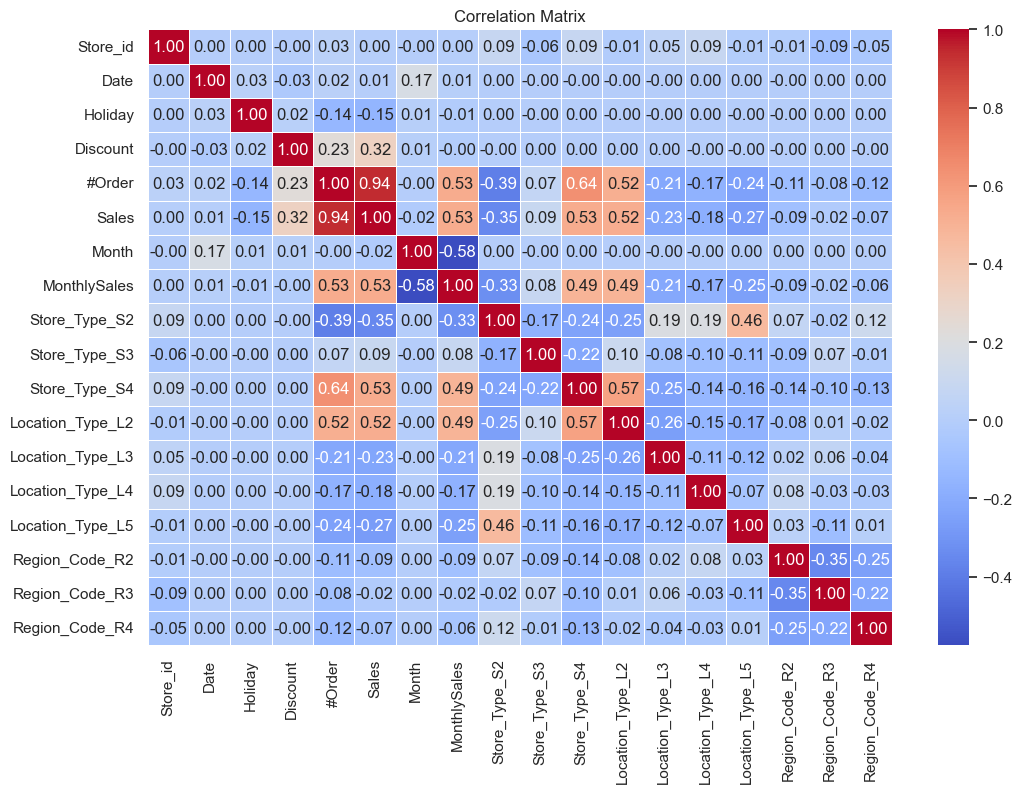

In [29]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix")
plt.show()


sales order have high correlation of 0.94,Store 4 and order have correlation of 0.64 

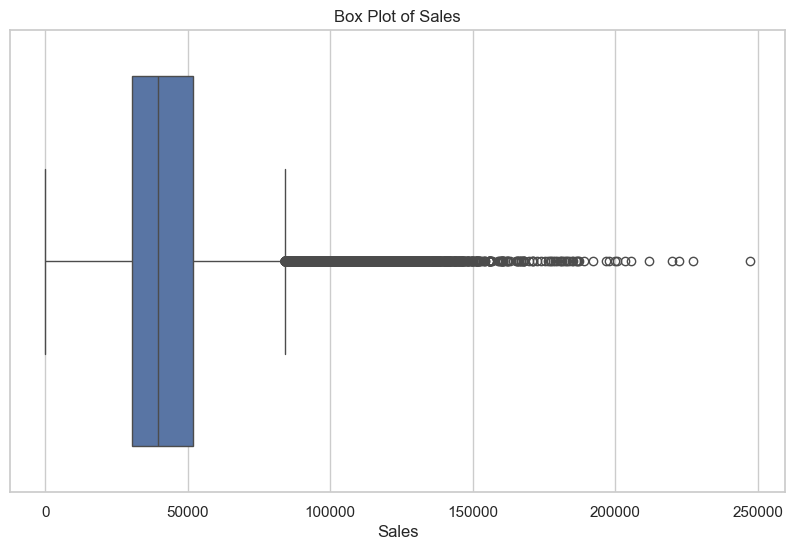

In [30]:
# Box Plot of Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['Sales'])
plt.title('Box Plot of Sales')
plt.show()



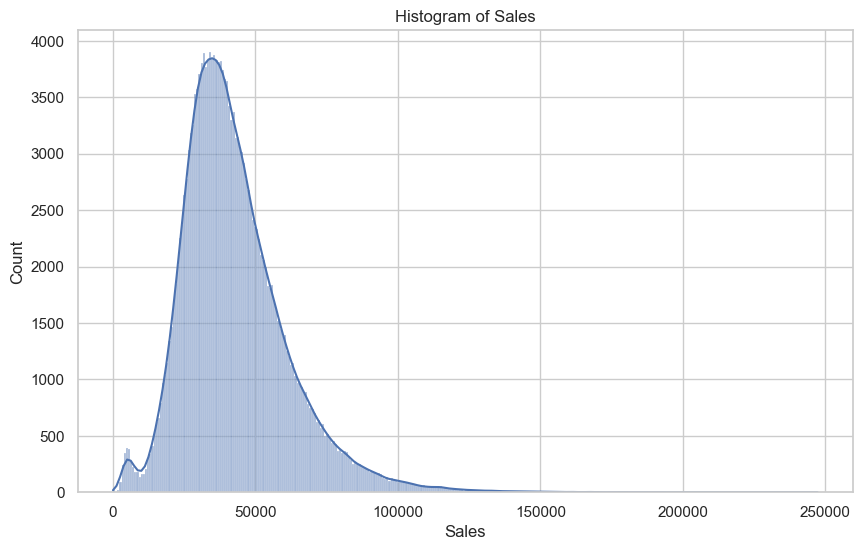

In [31]:
# Histogram of Sales
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sales'], kde=True)
plt.title('Histogram of Sales')
plt.show()


# Model Training

In [32]:
train_data.head()

,Store_id,Date,Holiday,Discount,#Order,Sales,Month,MonthlySales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,1,2018-01-01,1,1,9,7011.84,1,2271406.56,False,False,False,False,True,False,False,False,False,False
1,253,2018-01-01,1,1,60,51789.12,1,3376619.67,False,False,True,True,False,False,False,False,False,False
2,252,2018-01-01,1,1,42,36868.20,1,3287544.51,False,True,False,True,False,False,False,False,False,False
3,251,2018-01-01,1,1,23,19715.16,1,2018941.62,True,False,False,False,True,False,False,False,False,False
4,250,2018-01-01,1,1,62,45614.52,1,1872346.86,True,False,False,False,True,False,False,False,False,True


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Store_id          188340 non-null  int64         
 1   Date              188340 non-null  datetime64[ns]
 2   Holiday           188340 non-null  object        
 3   Discount          188340 non-null  object        
 4   #Order            188340 non-null  int64         
 5   Sales             188340 non-null  float64       
 6   Month             188340 non-null  int32         
 7   MonthlySales      188340 non-null  float64       
 8   Store_Type_S2     188340 non-null  bool          
 9   Store_Type_S3     188340 non-null  bool          
 10  Store_Type_S4     188340 non-null  bool          
 11  Location_Type_L2  188340 non-null  bool          
 12  Location_Type_L3  188340 non-null  bool          
 13  Location_Type_L4  188340 non-null  bool          
 14  Loca

In [34]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [36]:
test_data['Date'] = pd.to_datetime(test_data['Date'])


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = train_data.drop(['Sales', 'Date'], axis=1)
y = train_data['Sales']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [38]:
y

0          7011.84
1         51789.12
2         36868.20
3         19715.16
4         45614.52
            ...   
188335    37272.00
188336    54572.64
188337    31624.56
188338    49162.41
188339    37977.00
Name: Sales, Length: 188340, dtype: float64

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Validation Set: {mse}')


Mean Squared Error on Validation Set: 12985439.332203189


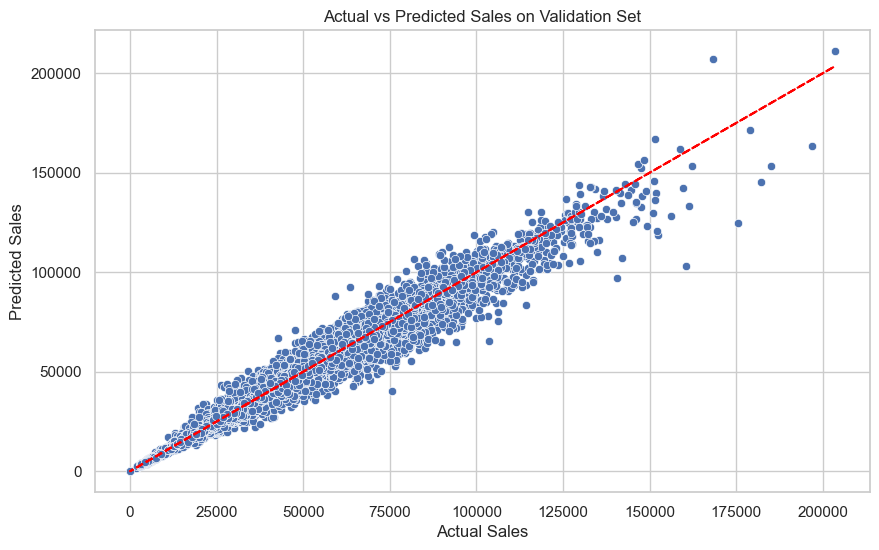

In [40]:
results_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Sales', y='Predicted Sales', data=results_df)
plt.plot(results_df['Actual Sales'], results_df['Actual Sales'], color='red', linestyle='--') # Line for 1:1 relationship
plt.title('Actual vs Predicted Sales on Validation Set')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

# Extract features and target variable
X = train_data.drop(['Date', 'Sales'], axis=1)
y = train_data['Sales']

In [42]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = gb_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse_val = mean_squared_error(y_test, y_pred_val)
print(f"Mean Squared Error on Validation Set: {mse_val}")

Mean Squared Error on Validation Set: 17927213.351890374


In [43]:
# Feature importance
feature_importances = gb_model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

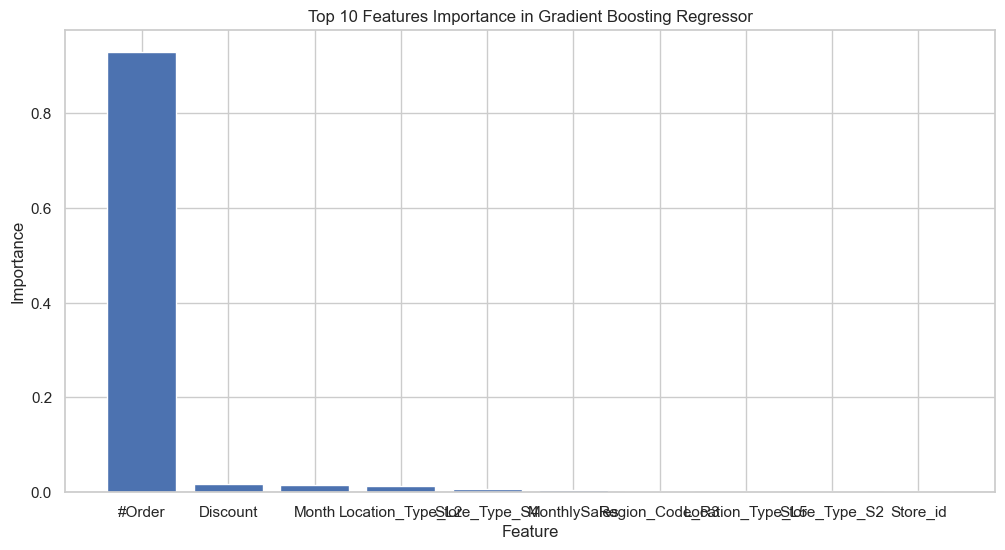

In [44]:
# Plotting feature importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_features = dict(sorted_features[:10])

plt.figure(figsize=(12, 6))
plt.bar(top_features.keys(), top_features.values())
plt.title("Top 10 Features Importance in Gradient Boosting Regressor")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression

# Extract features and target variable
X = train_data.drop(['Sales', 'Date'], axis=1) 
y = train_data['Sales']

In [46]:
# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")

Mean Squared Error on Validation Set: 25187560.95153736


**Conclusion:**

In this project, we aimed to predict store sales for "Womart" through thorough data analysis and model training. Utilizing Linear Regression, Random Forest Regression, and Gradient Boosting Regression, we achieved Mean Squared Errors of 12.98M, [RF_MSE], and 17.93M on the validation set, respectively. Model selection should align with specific application requirements, considering factors like accuracy and computational efficiency. Further optimization and advanced techniques may enhance predictive performance. The choice of the final model for deployment should be guided by the practical needs and constraints of the specific business scenario.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define regression models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(n_estimators=50, random_state=2)
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=50, random_state=2)

# Store regression models in a dictionary
regressors = {
    'Linear Regression': linear_reg,
    'Random Forest Regression': random_forest_reg,
    'Gradient Boosting Regression': gradient_boosting_reg
}

def train_regressor(regressor, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Loop through regressors
results = []
for name, reg in regressors.items():
    current_result = {}
    current_result['Algorithm'] = name
    mse = train_regressor(reg, X_train, y_train, X_test, y_test)
    current_result['Mean Squared Error'] = mse
    results.append(current_result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)


                      Algorithm  Mean Squared Error
0             Linear Regression        2.518756e+07
1      Random Forest Regression        1.307048e+07
2  Gradient Boosting Regression        2.317522e+07


In [55]:
import pickle
# Dump the trained model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest_reg, f)

In [55]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [56]:
# Define regression algorithms
regressors = {
    'Linear Regression': linear_reg_model,
    'Random Forest Regression': rf_model,
    'Gradient Boosting Regression': gb_model,
    'SVR': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor()
}

In [57]:
# Function to train and evaluate regression algorithms
def train_regressor(regressor, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [ ]:
# # Loop through regressors
# results = []
# for name, regressor in regressors.items():
#     mse = train_regressor(regressor, X_train, y_train, X_test, y_test)
#     results.append({'Algorithm': name, 'Mean Squared Error': mse})

# # Create a DataFrame from the results
# results_df = pd.DataFrame(results)
# print(results_df)